# Utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# set precision
#np.set_printoptions(precision=3)

## getLinePoints()

In [3]:
def getLinePoints(start, end):
    """Bresenham's Line Algorithm
    Produces a list of tuples from start and end
    http://www.roguebasin.com/index.php?title=Bresenham%27s_Line_Algorithm
    """
    # Setup initial conditions
    x1, y1 = start
    x2, y2 = end
    dx = x2 - x1
    dy = y2 - y1

    # Determine how steep the line is
    is_steep = abs(dy) > abs(dx)

    # Rotate line
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2

    # Swap start and end points if necessary and store swap state
    swapped = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        swapped = True

    # Recalculate differentials
    dx = x2 - x1
    dy = y2 - y1

    # Calculate error
    error = int(dx / 2.0)
    ystep = 1 if y1 < y2 else -1

    # Iterate over bounding box generating points between start and end
    y = y1
    points = []
    for x in range(x1, x2 + 1):
        coord = (y, x) if is_steep else (x, y)
        points.append(coord)
        error -= abs(dy)
        if error < 0:
            y += ystep
            error += dx

    # Reverse the list if the coordinates were swapped
    if swapped:
        points.reverse()
    return points

In [4]:
getLinePoints((0,0), (3,4))

[(0, 0), (1, 1), (1, 2), (2, 3), (3, 4)]

## plotPixels()

In [5]:
def plotPixels(x, y, xRange = (-10, 10), yRange = (-10, 10),figureSize = (4,4), 
                _color = 'black', title = None):
    fig, ax = plt.subplots()

    xticks = np.arange(xRange[0], xRange[1]+1, 1)
    yticks = np.arange(yRange[0], yRange[1]+1, 1)
    ax.set_xticks(xticks, minor = True)
    ax.set_yticks(yticks, minor = True)

    plt.xlim(xRange[0], xRange[1])
    plt.ylim(yRange[0], yRange[1])
    ax.grid(alpha = 0.3, which = 'both')
    # fig.set_size_inches(figureSize[0], figureSize[1])
    fig.set_figwidth(figureSize[0])
    fig.set_figheight(figureSize[1])
    # Add labels and show the plot
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)

    for i in range(len(x)):
        ax.add_patch(Rectangle((x[i]-0.5,y[i]-0.5), 1,1,
        # ax.add_patch(Rectangle((x[i],y[i]), 1,1, 
        facecolor=_color, 
        edgecolor='white',
        ))

    #plt.show()
    return fig, ax

# Viewport & Points

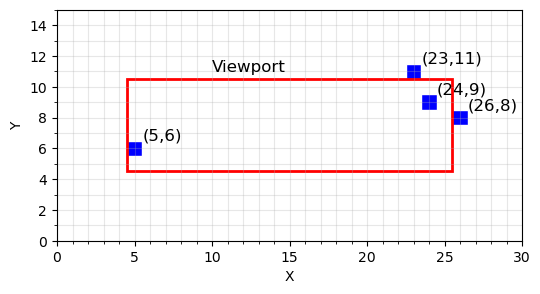

In [6]:
eii = [5,5]
esd = [25, 10]

p5 = [5, 6]
p6 = [26, 8]
p7 = [24,9]
p8 = [23, 11]

points = np.array([p5, p6, p7, p8])

x = points[:,0]
y = points[:,1]

fig, ax = plotPixels(x, y, xRange = (0,30), yRange = (0,15), _color = 'blue', figureSize=(6,3))

ax.add_patch(Rectangle((eii[0]-0.5,eii[1]-0.5), esd[0]-eii[0]+1, esd[1]-eii[1]+1, facecolor='none', edgecolor='red', linewidth=2))

for point in points:
    ax.text(point[0]+0.5, point[1]+0.5, f'({point[0]},{point[1]})', fontsize=12)
ax.text(10, 11, 'Viewport', fontsize=12)

plt.show()

# Brute Force Clipping

## Brute Force 1

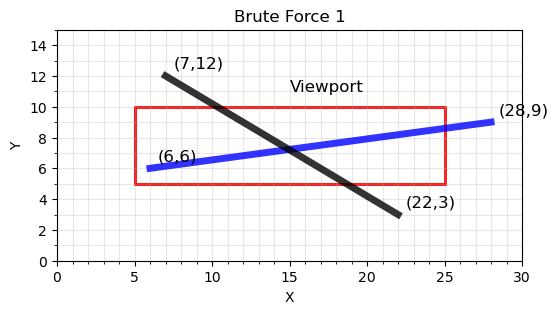

In [7]:
lrbt = [5, 25, 5, 10]
lineSegment1 = np.array([[6,6], [28,9]])
lineSegment2 = np.array([[7,12], [22,3]])

points = np.append(lineSegment1, lineSegment2, axis = 0)

# points1 = getLinePoints(lineSegment1[0], lineSegment1[1])
# points2 = getLinePoints(lineSegment2[0], lineSegment2[1])

# x1 = np.array(points1)[:,0]
# y1 = np.array(points1)[:,1]

# x2 = np.array(points2)[:,0]
# y2 = np.array(points2)[:,1]

#fig, ax = plotPixels(x1, y1, xRange = (0,30), yRange = (0,15), _color = 'blue', figureSize=(6,3), title = 'Brute Force 1')
fig, ax = plotPixels([], [], xRange = (0,30), yRange = (0,15), _color = 'blue', figureSize=(6,3), title = 'Brute Force 1')

ax.add_patch(Rectangle((lrbt[0],lrbt[2]), lrbt[1]-lrbt[0], lrbt[3]-lrbt[2], facecolor='none', edgecolor='red', linewidth=2))

# for i in range(len(x2)):
#         ax.add_patch(Rectangle((x2[i]-0.5,y2[i]-0.5), 1,1,
#         facecolor='black', 
#         edgecolor='white',
#         alpha = 0.8
#         ))
ax.plot(lineSegment1[:,0], lineSegment1[:,1], color = 'blue', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment2[:,0], lineSegment2[:,1], color = 'black', alpha = 0.8, linewidth = 5)

for point in points:
    ax.text(point[0]+0.5, point[1]+0.5, f'({point[0]},{point[1]})', fontsize=12)
ax.text(15, 11, 'Viewport', fontsize=12)


plt.show()


## Brute Force 2

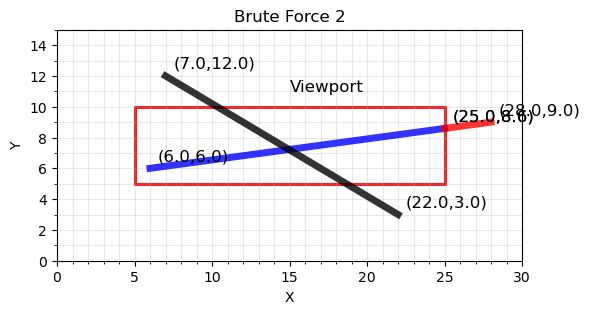

In [8]:
lrbt = [5, 25, 5, 10]
lineSegment1 = np.array([[6,6], [25,(189/22)]])
lineSegment1Clipped1 = np.array([[25,(189/22)], [28,9]])
lineSegment2 = np.array([[7,12], [22,3]])
points = np.append(lineSegment1, lineSegment2, axis = 0)
points = np.append(points, lineSegment1Clipped1, axis = 0)

fig, ax = plotPixels([], [], xRange = (0,30), yRange = (0,15), _color = 'blue', figureSize=(6,3), title = 'Brute Force 2')

ax.add_patch(Rectangle((lrbt[0],lrbt[2]), lrbt[1]-lrbt[0], lrbt[3]-lrbt[2], facecolor='none', edgecolor='red', linewidth=2))

ax.plot(lineSegment1[:,0], lineSegment1[:,1], color = 'blue', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment2[:,0], lineSegment2[:,1], color = 'black', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment1Clipped1[:,0], lineSegment1Clipped1[:,1], color = 'red', alpha = 0.8, linewidth = 5)

for point in points:
    ax.text(point[0]+0.5, point[1]+0.5, f'({round(point[0],1)},{round(point[1], 1)})', fontsize=12)
ax.text(15, 11, 'Viewport', fontsize=12)

plt.show()

## Brute Force 3

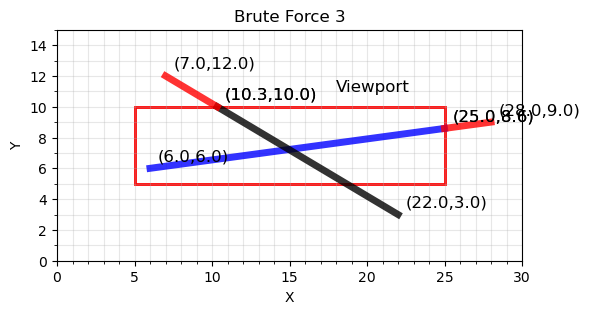

In [9]:
lrbt = [5, 25, 5, 10]
lineSegment1 = np.array([[6,6], [25,(189/22)]])
lineSegment1Clipped1 = np.array([[25,(189/22)], [28,9]])
lineSegment2 = np.array([[(31/3),10], [22,3]])
lineSegment2Clipped1 = np.array([[7,12], [(31/3),10]])

points = np.append(lineSegment1, lineSegment2, axis = 0)
points = np.append(points, lineSegment1Clipped1, axis = 0)
points = np.append(points, lineSegment2Clipped1, axis = 0)

fig, ax = plotPixels([], [], xRange = (0,30), yRange = (0,15), _color = 'blue', figureSize=(6,3), title = 'Brute Force 3')

ax.add_patch(Rectangle((lrbt[0],lrbt[2]), lrbt[1]-lrbt[0], lrbt[3]-lrbt[2], facecolor='none', edgecolor='red', linewidth=2))

ax.plot(lineSegment1[:,0], lineSegment1[:,1], color = 'blue', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment2[:,0], lineSegment2[:,1], color = 'black', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment1Clipped1[:,0], lineSegment1Clipped1[:,1], color = 'red', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment2Clipped1[:,0], lineSegment2Clipped1[:,1], color = 'red', alpha = 0.8, linewidth = 5)

for point in points:
    ax.text(point[0]+0.5, point[1]+0.5, f'({round(point[0],1)},{round(point[1], 1)})', fontsize=12)
ax.text(18, 11, 'Viewport', fontsize=12)

plt.show()

## Brute Force 4

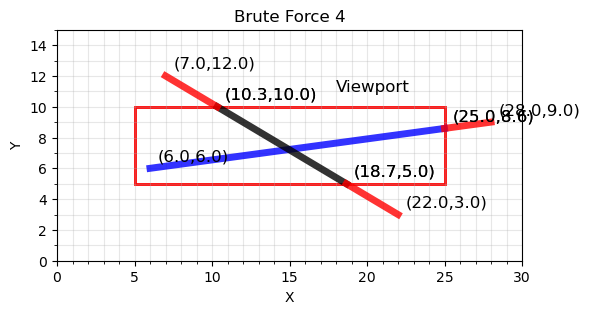

In [10]:
lrbt = [5, 25, 5, 10]
lineSegment1 = np.array([[6,6], [25,(189/22)]])
lineSegment1Clipped1 = np.array([[25,(189/22)], [28,9]])
lineSegment2 = np.array([[(31/3),10], [(56/3),5]])
lineSegment2Clipped1 = np.array([[7,12], [(31/3),10]])
lineSegment2Clipped2 = np.array([[(56/3),5], [22,3]])

points = np.append(lineSegment1, lineSegment2, axis = 0)
points = np.append(points, lineSegment1Clipped1, axis = 0)
points = np.append(points, lineSegment2Clipped1, axis = 0)
points = np.append(points, lineSegment2Clipped2, axis = 0)

fig, ax = plotPixels([], [], xRange = (0,30), yRange = (0,15), _color = 'blue', figureSize=(6,3), title = 'Brute Force 4')

ax.add_patch(Rectangle((lrbt[0],lrbt[2]), lrbt[1]-lrbt[0], lrbt[3]-lrbt[2], facecolor='none', edgecolor='red', linewidth=2))

ax.plot(lineSegment1[:,0], lineSegment1[:,1], color = 'blue', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment2[:,0], lineSegment2[:,1], color = 'black', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment1Clipped1[:,0], lineSegment1Clipped1[:,1], color = 'red', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment2Clipped1[:,0], lineSegment2Clipped1[:,1], color = 'red', alpha = 0.8, linewidth = 5)
ax.plot(lineSegment2Clipped2[:,0], lineSegment2Clipped2[:,1], color = 'red', alpha = 0.8, linewidth = 5)

for point in points:
    ax.text(point[0]+0.5, point[1]+0.5, f'({round(point[0],1)},{round(point[1], 1)})', fontsize=12)
ax.text(18, 11, 'Viewport', fontsize=12)

plt.show()

# Cohen-Sutherland line clipping

In [11]:
# Python program to implement Cohen Sutherland algorithm
# for line clipping.
 
# Defining region codes
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000
 
# Defining x_max, y_max and x_min, y_min for rectangle
# Since diagonal points are enough to define a rectangle
x_max = 10.0
y_max = 8.0
x_min = 4.0
y_min = 4.0
 
 
# Function to compute region code for a point(x, y)
def computeCode(x, y):
    code = INSIDE
    if x < x_min:      # to the left of rectangle
        code |= LEFT
    elif x > x_max:    # to the right of rectangle
        code |= RIGHT
    if y < y_min:      # below the rectangle
        code |= BOTTOM
    elif y > y_max:    # above the rectangle
        code |= TOP
 
    return code
 
 
# Implementing Cohen-Sutherland algorithm
# Clipping a line from P1 = (x1, y1) to P2 = (x2, y2)
def cohenSutherlandClip(x1, y1, x2, y2):
 
    # Compute region codes for P1, P2
    code1 = computeCode(x1, y1)
    code2 = computeCode(x2, y2)
    accept = False
 
    while True:
 
        # If both endpoints lie within rectangle
        if code1 == 0 and code2 == 0:
            accept = True
            break
 
        # If both endpoints are outside rectangle
        elif (code1 & code2) != 0:
            break
 
        # Some segment lies within the rectangle
        else:
 
            # Line Needs clipping
            # At least one of the points is outside,
            # select it
            x = 1.0
            y = 1.0
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2
 
            # Find intersection point
            # using formulas y = y1 + slope * (x - x1),
            # x = x1 + (1 / slope) * (y - y1)
            if code_out & TOP:
               
                # point is above the clip rectangle
                x = x1 + (x2 - x1) * \
                                (y_max - y1) / (y2 - y1)
                y = y_max
 
            elif code_out & BOTTOM:
                 
                # point is below the clip rectangle
                x = x1 + (x2 - x1) * \
                                (y_min - y1) / (y2 - y1)
                y = y_min
 
            elif code_out & RIGHT:
                 
                # point is to the right of the clip rectangle
                y = y1 + (y2 - y1) * \
                                (x_max - x1) / (x2 - x1)
                x = x_max
 
            elif code_out & LEFT:
                 
                # point is to the left of the clip rectangle
                y = y1 + (y2 - y1) * \
                                (x_min - x1) / (x2 - x1)
                x = x_min
 
            # Now intersection point x, y is found
            # We replace point outside clipping rectangle
            # by intersection point
            if code_out == code1:
                x1 = x
                y1 = y
                code1 = computeCode(x1, y1)
 
            else:
                x2 = x
                y2 = y
                code2 = computeCode(x2, y2)
 
    if accept:
        print ("Line accepted from %.2f, %.2f to %.2f, %.2f" % (x1, y1, x2, y2))
 
        # Here the user can add code to display the rectangle
        # along with the accepted (portion of) lines
 
    else:
        print("Line rejected")
 
# Driver Script
# First Line segment
# P11 = (5, 5), P12 = (7, 7)
cohenSutherlandClip(5, 5, 7, 7)
 
# Second Line segment
# P21 = (7, 9), P22 = (11, 4)
cohenSutherlandClip(7, 9, 11, 4)
 
# Third Line segment
# P31 = (1, 5), P32 = (4, 1)
cohenSutherlandClip(1, 5, 4, 1)

Line accepted from 5.00, 5.00 to 7.00, 7.00
Line accepted from 7.80, 8.00 to 10.00, 5.25
Line rejected


## Cohen-Sutherland 1

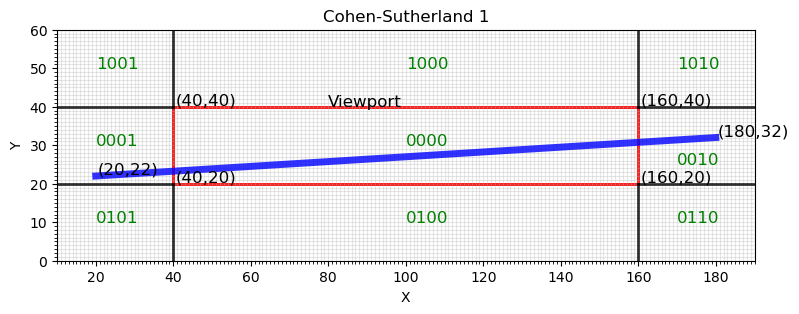

In [34]:
ps = np.array([20, 22])
pe = [180, 32]
lineSegment = np.array([ps, pe])

eii = [40, 20]
esd = [160, 40]

points = np.append(lineSegment, [eii], axis = 0)
points = np.append(points, [esd], axis = 0)
points = np.append(points, [[esd[0],eii[1]]], axis = 0)
points = np.append(points, [[eii[0],esd[1]]], axis = 0)


fig, ax = plotPixels([], [], xRange = (10,190), yRange = (0,60), _color = 'blue', figureSize=(9,3), title = 'Cohen-Sutherland 1')

ax.add_patch(Rectangle((eii[0],eii[1]), esd[0]-eii[0], esd[1]-eii[1], facecolor='none', edgecolor='red', linewidth=2))

ax.plot(lineSegment[:,0], lineSegment[:,1], color = 'blue', alpha = 0.8, linewidth = 5)

ax.plot([10, 40], [40, 40], color = 'black', alpha = 0.8, linewidth = 2)
ax.plot([10, 40], [20, 20], lineSegment1Clipped1[:,1], color = 'black', alpha = 0.8, linewidth = 2)
ax.plot([160, 190], [40, 40], color = 'black', alpha = 0.8, linewidth = 2)
ax.plot([160, 190], [20, 20], lineSegment1Clipped1[:,1], color = 'black', alpha = 0.8, linewidth = 2)

ax.plot([40, 40], [40, 60], color = 'black', alpha = 0.8, linewidth = 2)
ax.plot([40, 40], [0, 20], lineSegment1Clipped1[:,1], color = 'black', alpha = 0.8, linewidth = 2)
ax.plot([160, 160], [40, 60], color = 'black', alpha = 0.8, linewidth = 2)
ax.plot([160, 160], [0, 20], lineSegment1Clipped1[:,1], color = 'black', alpha = 0.8, linewidth = 2)

for point in points:
    ax.text(point[0]+0.5, point[1]+0.5, f'({round(point[0],1)},{round(point[1], 1)})', fontsize=12)
ax.text(80, 40, 'Viewport', fontsize=12)
ax.text(20, 50, '1001', fontsize=12, color = 'green')
ax.text(170, 50, '1010', fontsize=12, color = 'green')
ax.text(170, 10, '0110', fontsize=12, color = 'green')
ax.text(20, 10, '0101', fontsize=12, color = 'green')
ax.text(100, 50, '1000', fontsize=12, color = 'green')
ax.text(170, 25, '0010', fontsize=12, color = 'green')
ax.text(100, 10, '0100', fontsize=12, color = 'green')
ax.text(20, 30, '0001', fontsize=12, color = 'green')
ax.text(100, 30, '0000', fontsize=12, color = 'green')

plt.show()


# Cyrus-Beck

## Description

The Cyrus-Beck algorithm is a line clipping algorithm that can be used to determine the portion of a line that lies within a specified boundary. In Python, you can implement this algorithm using the following steps:

    Define the boundary of the clip window as a list of points in the form [(x1, y1), (x2, y2), ..., (xn, yn)].

    Define the line to be clipped as a pair of points (x1, y1) and (x2, y2).

    For each edge of the clip window, compute the normal vector to the edge. The normal vector is a vector that is perpendicular to the edge and points outward from the clip window.

    For each normal vector, compute the dot product between the normal vector and the vector representing the line. If the dot product is positive, the line is outside the clip window for that edge. If the dot product is negative, the line is inside the clip window for that edge.

    If the line is outside the clip window for any edge, clip the line at that edge using the intersection point between the line and the edge.

    Repeat steps 3-5 for each edge of the clip window until the line is completely within the clip window or there are no more edges to consider.

## code

In [ ]:
# Define the clip window boundary
clip_window = [(0, 0), (100, 0), (100, 100), (0, 100)]

# Define the line to be clipped
line = [(10, 10), (110, 110)]

# Loop through each edge of the clip window
for i in range(len(clip_window)):
    # Get the current edge
    edge = (clip_window[i], clip_window[(i + 1) % len(clip_window)])

    # Compute the normal vector to the edge
    normal = (edge[1][1] - edge[0][1], edge[0][0] - edge[1][0])

    # Compute the dot product between the normal vector and the line vector
    dp = normal[0] * (line[1][0] - line[0][0]) + normal[1] * (line[1][1] - line[0][1])

    # If the dot product is positive, the line is outside the clip window
    if dp > 0:
        # Compute the intersection point between the line and the edge
        t = normal[0] * (edge[0][0] - line[0][0]) + normal[1] * (edge[0][1] - line[0][1])
        t = t / dp

        # If t is less than 0, the intersection point is outside the line
        if t < 0:
            continue

        # If t is greater than 1, the intersection point is outside the line
        if t > 1:
            continue

        # Compute the coordinates of the intersection point
        intersection = (line[0][0] + t * (line[1][0] - line[0][0]), line[0][1] + t * (line[1][1] - line[0][1]))

        # Update the line with the intersection point as one of its endpoints
        if dp > 0:
            line = [intersection, line[1]]
            print("0: ",line)
        else:
            line = [line[0], intersection]
            print("1: ",line)


0:  [(100.0, 100.0), (110, 110)]
0:  [(100.0, 100.0), (110, 110)]


In [ ]:
# Define the clip window boundary
#clip_window = [(0, 0), (100, 0), (100, 100), (0, 100)]

# Define the line to be clipped
#line = [(10, 10), (110, 110)]

def cyrusBeck(line, clipWindow):

    # Loop through each edge of the clip window
    for i in range(len(clip_window)):
        # Get the current edge
        edge = (clip_window[i], clip_window[(i + 1) % len(clip_window)])

        # Compute the normal vector to the edge
        normal = (edge[1][1] - edge[0][1], edge[0][0] - edge[1][0])

        # Compute the dot product between the normal vector and the line vector
        dp = normal[0] * (line[1][0] - line[0][0]) + normal[1] * (line[1][1] - line[0][1])

        # If the dot product is positive, the line is outside the clip window
        if dp > 0:
            # Compute the intersection point between the line and the edge
            t = normal[0] * (edge[0][0] - line[0][0]) + normal[1] * (edge[0][1] - line[0][1])
            t = t / dp

            # If t is less than 0, the intersection point is outside the line
            if t < 0:
                continue

            # If t is greater than 1, the intersection point is outside the line
            if t > 1:
                continue

            # Compute the coordinates of the intersection point
            intersection = (line[0][0] + t * (line[1][0] - line[0][0]), line[0][1] + t * (line[1][1] - line[0][1]))

            # Update the line with the intersection point as one of its endpoints
            if dp > 0:
                line = [intersection, line[1]]
                print(line)
            else:
                line = [line[0], intersection]
                print(line)


This code checks if the dot product between the normal vector and the line vector is positive. If it is, it means that the line is outside the clip window for that edge. The code then computes the intersection point between the line and the edge, and uses it to update the line by replacing one of its endpoints with the intersection point. This ensures that the line is clipped at the edge of the clip window.

## Graphics

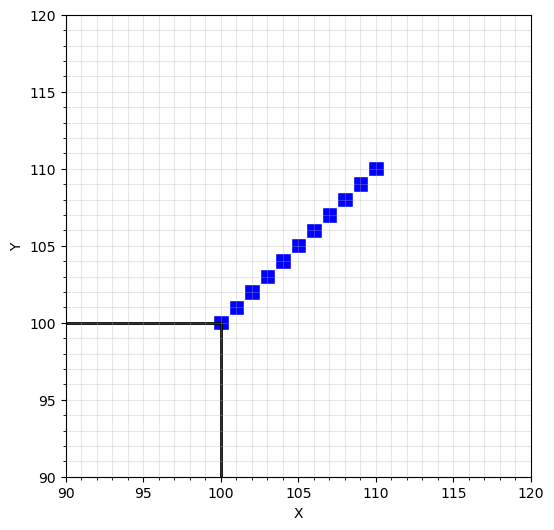

In [ ]:
linePoints = getLinePoints((100, 100), (110, 110))
#x = [0, 50, 1, 2]
#y = [0, 71, 0, 3]

x, y = zip(*linePoints)


fig, ax = plotPixels(x, y, xRange = (90,120), yRange = (90,120), _color = 'blue', figureSize=(6,6))
ax.add_patch(Rectangle((0,0), 100,100, facecolor='none', edgecolor='black', linewidth=2))

## Tests